In [1]:
import pandas as pd
pd.set_option("display.max_columns", 200)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn import set_config
set_config(transform_output="pandas")

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

import joblib

import sys
src_path = '../src'
sys.path.insert(0, src_path)
from eval_classification import eval_classification
del sys.path[0]

# Import preprocessor

In [2]:
saved = joblib.load("../lib/preprocessor.joblib")
preprocessor = saved["preprocessor"]

# Import data and merge other prepared data

In [3]:
input_path = "../../kaggle/input/home-credit-default-risk/" # on local machine
# input_path = "/kaggle/input/home-credit-default-risk/" # on Kaggle

application_train = pd.read_csv(input_path + "application_train.csv")
bureau_loans_and_balances = pd.read_csv("bureau_loans_and_balances.csv")
application_train = pd.merge(application_train, bureau_loans_and_balances, how="left", on="SK_ID_CURR")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_BUREAU,MONTHS_BALANCE,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-109646.0,0.0,-40752.0,-72756.0,73472.58,0.0,12252772.26,3932496.0,127954.26,0.0,-69516.0,0.0,-2701.0,64.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-5603.0,0.0,-2178.0,-3292.0,0.00,0.0,1017400.50,0

In [4]:
# split data
X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train["TARGET"].copy()

In [5]:
# Training split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [6]:
preprocessor.fit(X_train, y_train)

X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56549
           1       0.16      0.67      0.26      4953

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.90      0.69      0.76     61502



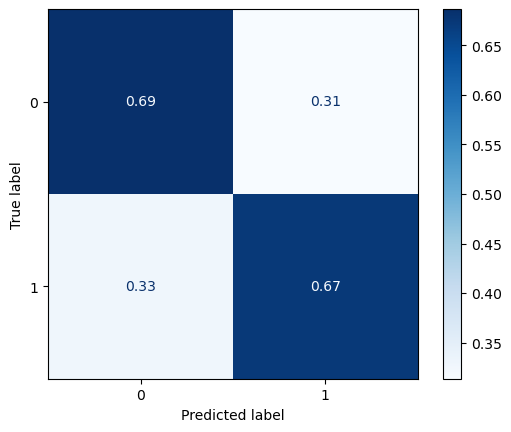

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226137
           1       0.16      0.66      0.25     19872

    accuracy                           0.68    246009
   macro avg       0.56      0.67      0.53    246009
weighted avg       0.89      0.68      0.75    246009



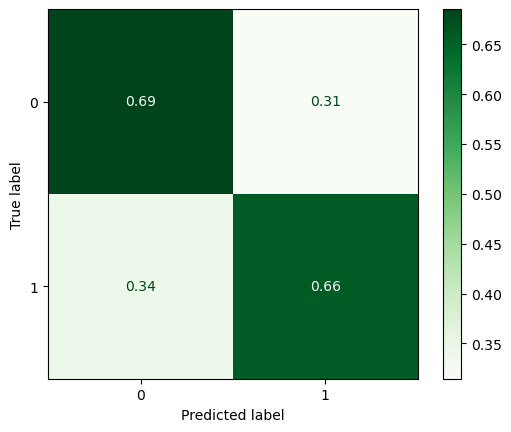

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.15539,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948


In [7]:
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")

logreg_pipe = make_pipeline(preprocessor, StandardScaler(), logreg)

logreg_pipe.fit(X_train, y_train)

logreg_results = eval_classification(logreg_pipe, X_train, y_train, X_test, y_test,
                              model_name="Logistic Regression")

logreg_results

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56549
           1       0.16      0.67      0.26      4953

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.90      0.69      0.76     61502



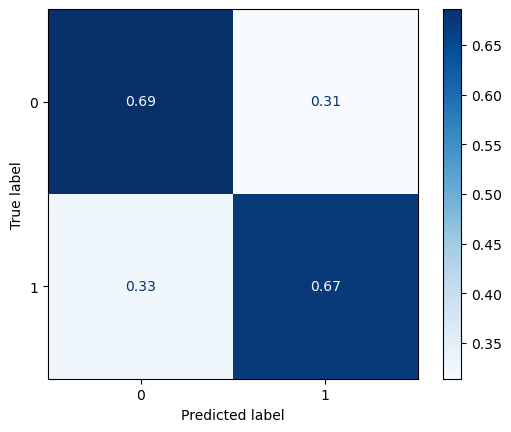

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226137
           1       0.16      0.66      0.25     19872

    accuracy                           0.68    246009
   macro avg       0.56      0.67      0.53    246009
weighted avg       0.89      0.68      0.75    246009



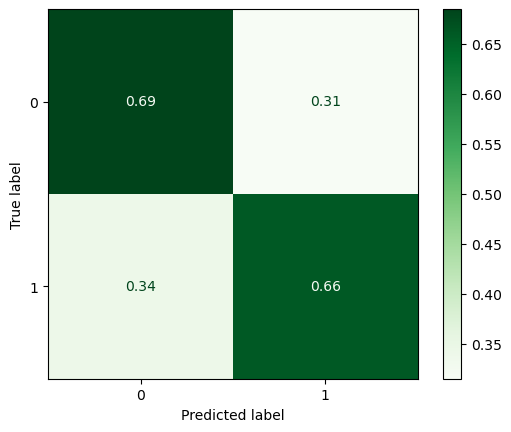

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218


In [8]:
logreg_cv = LogisticRegressionCV(max_iter=1000, class_weight="balanced", Cs=100, cv=8, scoring="roc_auc")

logreg_cv_pipe = make_pipeline(preprocessor, StandardScaler(), logreg_cv)

logreg_cv_pipe.fit(X_train, y_train)

logreg_cv_results = eval_classification(logreg_cv_pipe, X_train, y_train, X_test, y_test,
                              model_name="Logistic Regression CV", results_frame=logreg_results)

logreg_cv_results

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56549
           1       1.00      1.00      1.00      4953

    accuracy                           1.00     61502
   macro avg       1.00      1.00      1.00     61502
weighted avg       1.00      1.00      1.00     61502



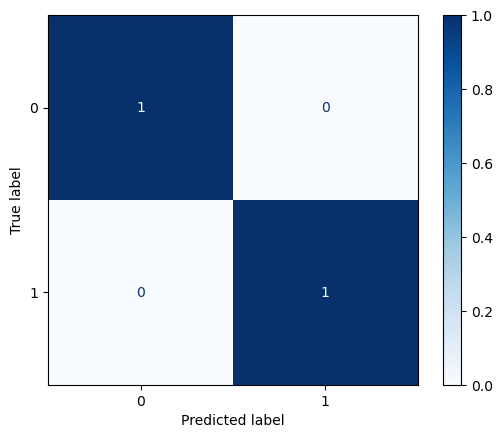

Test Evaluation
              precision    recall  f1-score   support

           0       0.93      0.92      0.92    226137
           1       0.14      0.16      0.15     19872

    accuracy                           0.86    246009
   macro avg       0.53      0.54      0.54    246009
weighted avg       0.86      0.86      0.86    246009



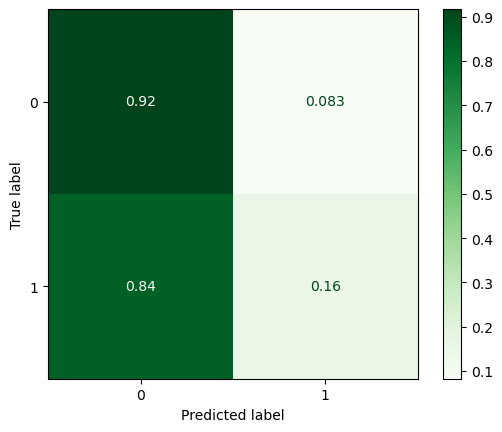

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053


In [9]:
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt_pipe = make_pipeline(preprocessor, dt).fit(X_train, y_train)

dt_results = eval_classification(dt_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="Decision Tree", results_frame=logreg_cv_results)

dt_results

In [10]:
dt.get_depth()

79

In [11]:
dt.tree_.max_depth

79

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.65      0.77     56549
           1       0.14      0.66      0.23      4953

    accuracy                           0.65     61502
   macro avg       0.55      0.66      0.50     61502
weighted avg       0.89      0.65      0.73     61502



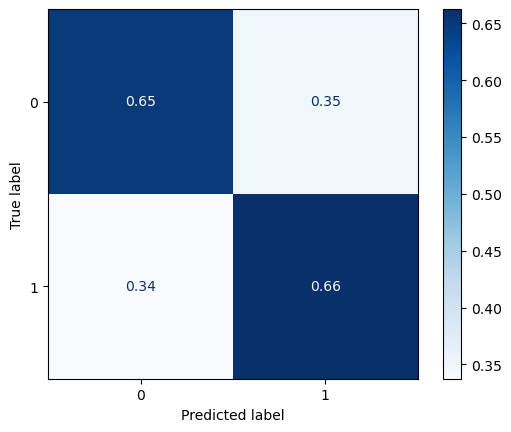

Test Evaluation
              precision    recall  f1-score   support

           0       0.95      0.65      0.77    226137
           1       0.14      0.64      0.23     19872

    accuracy                           0.65    246009
   macro avg       0.55      0.64      0.50    246009
weighted avg       0.89      0.65      0.73    246009



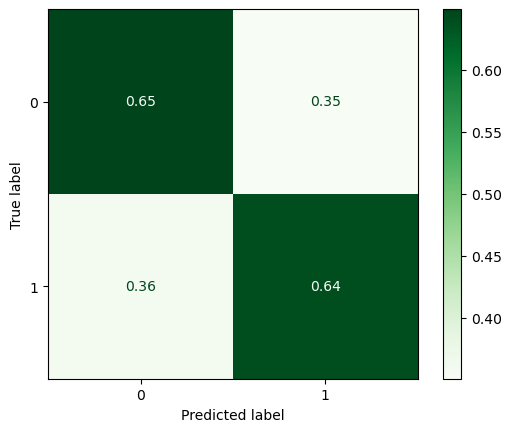

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053
Decision Tree CV,0.651735,0.648358,0.142510,0.138258,0.662629,0.640801,0.234571,0.227444,0.709635,0.690478


In [12]:
dt_params = {'max_depth': range(1, 80, 4)}
dt_gs = GridSearchCV(dt, dt_params, scoring="roc_auc")
dt_gs.fit(X_train_proc, y_train)
dt_cv = dt_gs.best_estimator_
dt_cv_pipe = make_pipeline(preprocessor, dt_cv).fit(X_train, y_train)

dt_cv_results = eval_classification(dt_cv_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="Decision Tree CV", results_frame=dt_results)

dt_cv_results

Train Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56549
           1       0.69      0.07      0.13      4953

    accuracy                           0.92     61502
   macro avg       0.81      0.53      0.54     61502
weighted avg       0.91      0.92      0.89     61502



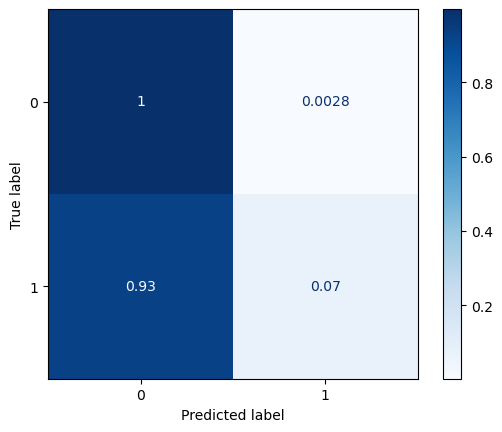

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    226137
           1       0.16      0.02      0.03     19872

    accuracy                           0.91    246009
   macro avg       0.54      0.50      0.49    246009
weighted avg       0.86      0.91      0.88    246009



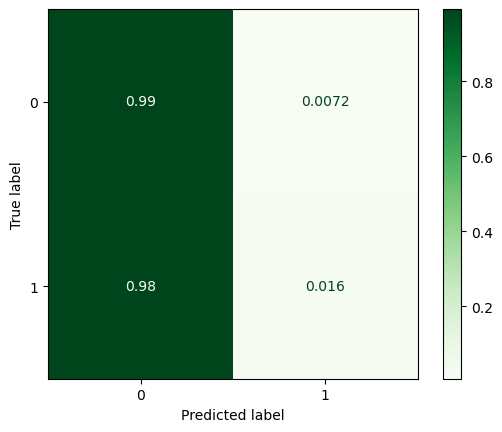

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053
Decision Tree CV,0.651735,0.648358,0.142510,0.138258,0.662629,0.640801,0.234571,0.227444,0.709635,0.690478
K Nearest Neighbors,0.922523,0.913910,0.685771,0.161574,0.070059,0.015700,0.127130,0.028620,0.897560,0.560490


In [13]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, StandardScaler(), knn).fit(X_train, y_train)

knn_results = eval_classification(knn_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="K Nearest Neighbors", results_frame=dt_cv_results)

knn_results

In [14]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Train Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56549
           1       0.67      0.03      0.06      4953

    accuracy                           0.92     61502
   macro avg       0.79      0.51      0.51     61502
weighted avg       0.90      0.92      0.89     61502



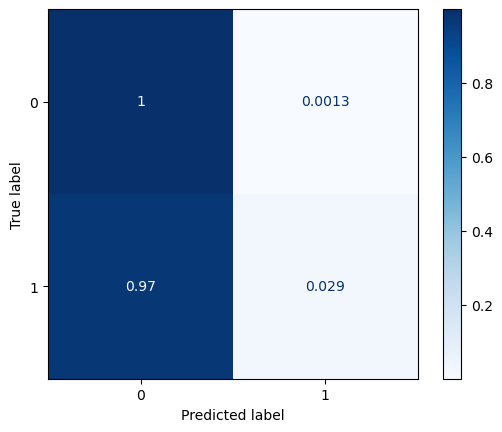

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226137
           1       0.20      0.01      0.02     19872

    accuracy                           0.92    246009
   macro avg       0.56      0.50      0.49    246009
weighted avg       0.86      0.92      0.88    246009



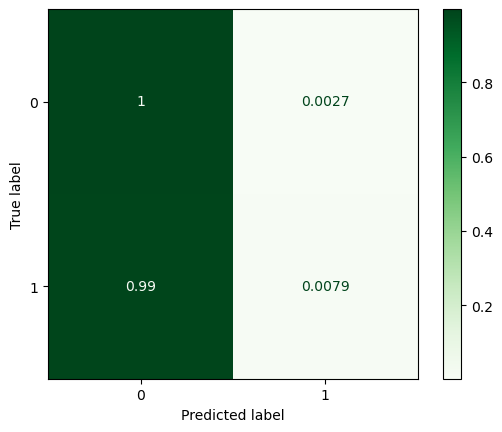

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053
Decision Tree CV,0.651735,0.648358,0.142510,0.138258,0.662629,0.640801,0.234571,0.227444,0.709635,0.690478
K Nearest Neighbors,0.922523,0.913910,0.685771,0.161574,0.070059,0.015700,0.127130,0.028620,0.897560,0.560490
K Nearest Neighbors CV,0.920620,0.917357,0.665116,0.203105,0.028871,0.007901,0.055341,0.015209,0.868297,0.572359


In [15]:
knn_params = {'n_neighbors': range(3,8),
              'leaf_size': [10, 20, 30, 40, 50]}
knn_gs = GridSearchCV(knn, knn_params, scoring="roc_auc")
knn_gs.fit(X_train_proc, y_train)
knn_cv = knn_gs.best_estimator_

knn_cv_pipe = make_pipeline(preprocessor, StandardScaler(), knn_cv).fit(X_train, y_train)

knn_cv_results = eval_classification(knn_cv_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="K Nearest Neighbors CV", results_frame=knn_results)

knn_cv_results

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56549
           1       1.00      1.00      1.00      4953

    accuracy                           1.00     61502
   macro avg       1.00      1.00      1.00     61502
weighted avg       1.00      1.00      1.00     61502



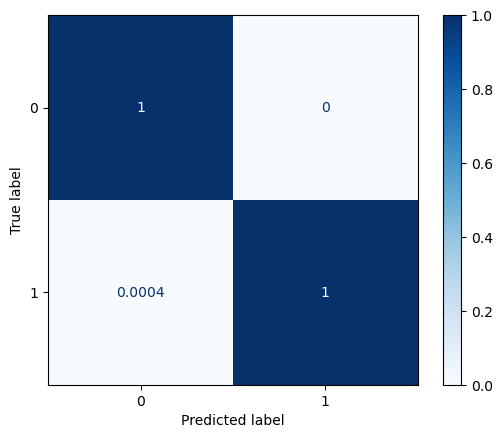

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226137
           1       0.67      0.00      0.00     19872

    accuracy                           0.92    246009
   macro avg       0.79      0.50      0.48    246009
weighted avg       0.90      0.92      0.88    246009



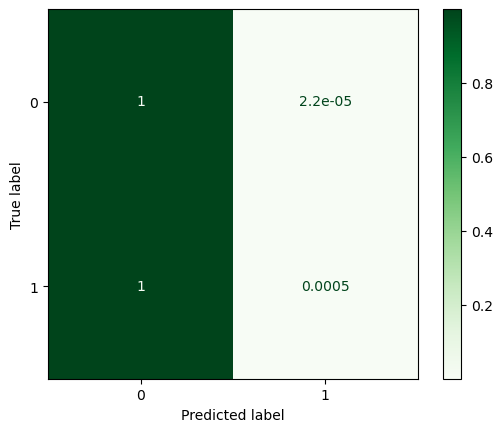

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053
Decision Tree CV,0.651735,0.648358,0.142510,0.138258,0.662629,0.640801,0.234571,0.227444,0.709635,0.690478
K Nearest Neighbors,0.922523,0.913910,0.685771,0.161574,0.070059,0.015700,0.127130,0.028620,0.897560,0.560490
K Nearest Neighbors CV,0.920620,0.917357,0.665116,0.203105,0.028871,0.007901,0.055341,0.015209,0.868297,0.572359
Random Forest,0.999967,0.919243,1.000000,0.666667,0.999596,0.000503,0.999798,0.001006,1.000000,0.704284


In [17]:
rf = RandomForestClassifier(random_state=42)

rf_pipe = make_pipeline(preprocessor, StandardScaler(), rf).fit(X_train, y_train)

rf_results = eval_classification(rf_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="Random Forest", results_frame=knn_cv_results)

rf_results

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56549
           1       1.00      1.00      1.00      4953

    accuracy                           1.00     61502
   macro avg       1.00      1.00      1.00     61502
weighted avg       1.00      1.00      1.00     61502



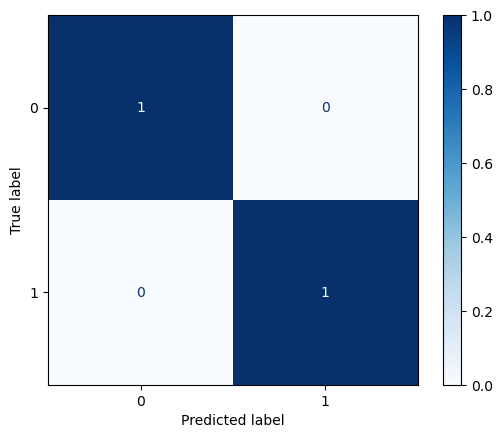

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226137
           1       0.38      0.00      0.00     19872

    accuracy                           0.92    246009
   macro avg       0.65      0.50      0.48    246009
weighted avg       0.88      0.92      0.88    246009



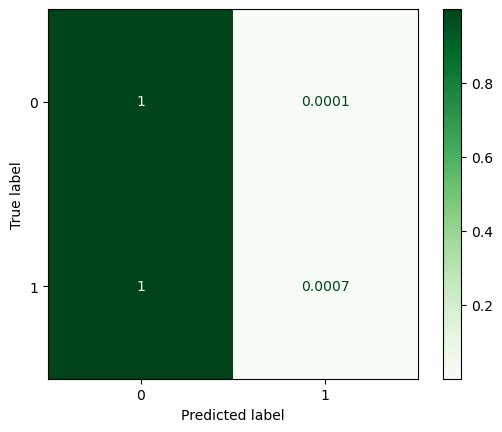

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053
Decision Tree CV,0.651735,0.648358,0.142510,0.138258,0.662629,0.640801,0.234571,0.227444,0.709635,0.690478
K Nearest Neighbors,0.922523,0.913910,0.685771,0.161574,0.070059,0.015700,0.127130,0.028620,0.897560,0.560490
K Nearest Neighbors CV,0.920620,0.917357,0.665116,0.203105,0.028871,0.007901,0.055341,0.015209,0.868297,0.572359
Random Forest,0.999967,0.919243,1.000000,0.666667,0.999596,0.000503,0.999798,0.001006,1.000000,0.704284
Random Forest CV,1.000000,0.919186,1.000000,0.378378,1.000000,0.000705,1.000000,0.001406,1.000000,0.723484


In [ ]:
rf_params = {"class_weight" : ["balanced", "balanced_subsample"],
             "n_estimators" : [10, 50, 100, 150]}
rf_gs = GridSearchCV(rf, rf_params, scoring="roc_auc")
rf_gs.fit(X_train_proc, y_train)
rf_cv = rf_gs.best_estimator_

rf_cv_pipe = make_pipeline(preprocessor, StandardScaler(), rf_cv).fit(X_train, y_train)

rf_cv_results = eval_classification(rf_cv_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="Random Forest CV", results_frame=rf_results)

rf_cv_results

# Stacking Classifier

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Train Evaluation
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     56549
           1       1.00      0.64      0.78      4953

    accuracy                           0.97     61502
   macro avg       0.98      0.82      0.88     61502
weighted avg       0.97      0.97      0.97     61502



/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


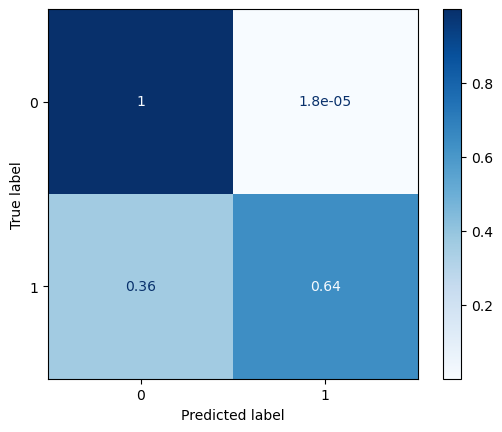

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226137
           1       0.48      0.01      0.03     19872

    accuracy                           0.92    246009
   macro avg       0.70      0.51      0.49    246009
weighted avg       0.88      0.92      0.88    246009



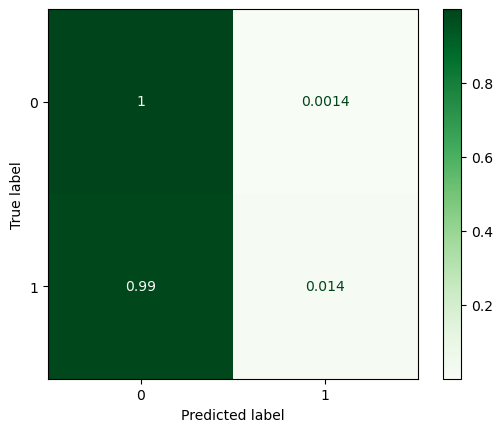

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

estimators = [('rf', rf_cv_pipe),
                ('svr', make_pipeline(preprocessor,
                                    StandardScaler(),
                                    LinearSVC(random_state=42))),
                ('clf', logreg_cv_pipe),
                ('dt', dt_cv_pipe)]
clf_stack = StackingClassifier(estimators=estimators)

clf_stack.fit(X_train, y_train)

stacked_results = eval_classification(clf_stack, X_train, y_train, X_test, y_test, 
                                  model_name="Stacked Classifier", results_frame=rf_cv_results)

In [23]:
stacked_results

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression,0.685262,0.683199,0.158187,0.155390,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948
Logistic Regression CV,0.685018,0.682934,0.157945,0.155336,0.672118,0.659169,0.255782,0.251423,0.745881,0.732218
Decision Tree,1.000000,0.855997,1.000000,0.142929,1.000000,0.156653,1.000000,0.149477,1.000000,0.537053
Decision Tree CV,0.651735,0.648358,0.142510,0.138258,0.662629,0.640801,0.234571,0.227444,0.709635,0.690478
K Nearest Neighbors,0.922523,0.913910,0.685771,0.161574,0.070059,0.015700,0.127130,0.028620,0.897560,0.560490
K Nearest Neighbors CV,0.920620,0.917357,0.665116,0.203105,0.028871,0.007901,0.055341,0.015209,0.868297,0.572359
Random Forest,0.999967,0.919243,1.000000,0.666667,0.999596,0.000503,0.999798,0.001006,1.000000,0.704284
Random Forest CV,1.000000,0.919186,1.000000,0.378378,1.000000,0.000705,1.000000,0.001406,1.000000,0.723484
Stacked Classifier,0.970749,0.919105,0.999683,0.475630,0.636988,0.014241,0.778148,0.027654,0.999445,0.742216


# Threshhold Classifier

In [24]:
test_data_file = "application_test.csv"
application_test = pd.read_csv(input_path + test_data_file)

application_test = pd.merge(application_test, bureau_loans_and_balances, how="left", on="SK_ID_CURR")
# application_test = test_data.drop_duplicates(subset=["SK_ID_CURR"])

ids = application_test.pop("SK_ID_CURR")
preds = clf_stack.predict_proba(application_test)[:,1]

output = pd.DataFrame({"SK_ID_CURR": ids,
                       "TARGET": preds})

/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
output

,SK_ID_CURR,TARGET
0,100001,0.052044
1,100005,0.160376
2,100013,0.030470
3,100028,0.035655
4,100038,0.122432
...,...,...
48739,456221,0.049715
48740,456222,0.073418
48741,456223,0.041100
48742,456224,0.032708


In [27]:
sample_submission_file = "sample_submission.csv"
sample_submission_df = pd.read_csv(input_path + sample_submission_file)
sample_submission_df["TARGET"] = preds
sample_submission_df.to_csv("02_stack_preliminary.csv", index=False)
sample_submission_df.head()

,SK_ID_CURR,TARGET
0,100001,0.052044
1,100005,0.160376
2,100013,0.030470
3,100028,0.035655
4,100038,0.122432
